In [1]:
import sqlite3

# Connect to DB (creates the file)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert the given sales data
sales_data = [
    ('Milk', 12, 2.0), ('Bread', 15, 1.2), ('Eggs', 30, 0.25),
    ('Cheese', 5, 3.5), ('Milk', 8, 1.8), ('Bread', 10, 1.3),
    ('Eggs', 20, 0.3), ('Butter', 6, 2.5), ('Juice', 9, 2.8),
    ('Cereal', 7, 3.2), ('Milk', 10, 2.2), ('Cheese', 7, 3.4),
    ('Butter', 5, 2.6), ('Juice', 10, 2.7), ('Cereal', 6, 3.1),
    ('Yogurt', 20, 1.0), ('Apples', 25, 0.9), ('Bananas', 18, 0.6),
    ('Oranges', 22, 0.8), ('Yogurt', 15, 1.1), ('Apples', 20, 1.0),
    ('Bananas', 20, 0.65), ('Oranges', 15, 0.85)
]

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# Save and close
conn.commit()
conn.close()

print("Database created and data inserted.")


Database created and data inserted.


Sales Summary:

    product  total_quantity  total_revenue
0      Milk              30          60.40
1     Juice              19          52.20
2    Apples              45          42.50
3    Cheese              12          41.30
4    Cereal              13          41.00
5    Yogurt              35          36.50
6     Bread              25          31.00
7   Oranges              37          30.35
8    Butter              11          28.00
9   Bananas              38          23.80
10     Eggs              50          13.50


<Figure size 1000x600 with 0 Axes>

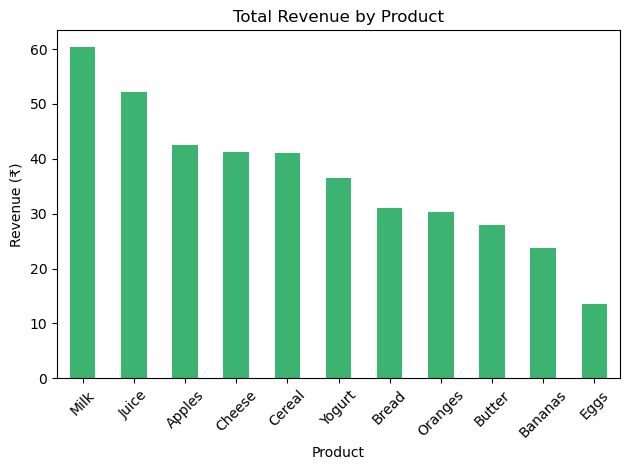

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the DB
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue by product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print output
print("Sales Summary:\n")
print(df)

# Plotting revenue by product
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='mediumseagreen')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
